In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats as st
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('breast-cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
 # M - Malignant (Cancerous)   B - Benign (Non Cancerous)

In [6]:
dataset.drop(['id'],axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# DATA PRE PROCESSING

## 1.MISSING DATA

In [7]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
#NO MISSING DATA PRESENT IN THE DATASET.

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_H=le.fit_transform(dataset['diagnosis'])
dataset['diagnosis']=le_H
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 2. OUTLIER HANDLING


In [10]:
#NO NEED TO HANDLE OUTLIER AS THIS IS CLASSIFICATION PROBLEM STATEMENT.

## 3.FEATURE SCALING 

In [11]:
#NO FEATURE SCALING IS REQUIRED AS THIS IS A CLASSSIFICATION PROBLEM STATEMENT.

## 4.ENCODING

In [12]:
#LABEL ENCODING OF FEATURE 'DIAGNOSIS' IS REQUIRED..

## 5.IMBALANCE DATASET CHECKING

In [13]:
#Check whether Class is balance or imbalance

imbalance=dataset['diagnosis'].value_counts()
imbalance

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
if imbalance[1] >= 2*imbalance[0]:
    print("Imbalance Data set")
else:
    print("Balance Data set")

Balance Data set


In [15]:
#NO NEED TO PERFORM ANY IMBALANCE TECHNIQUES

# MODEL BUILDING 

In [16]:
#Correlation Matrix 
dataset= dataset.drop('id',axis=1)

<AxesSubplot:>

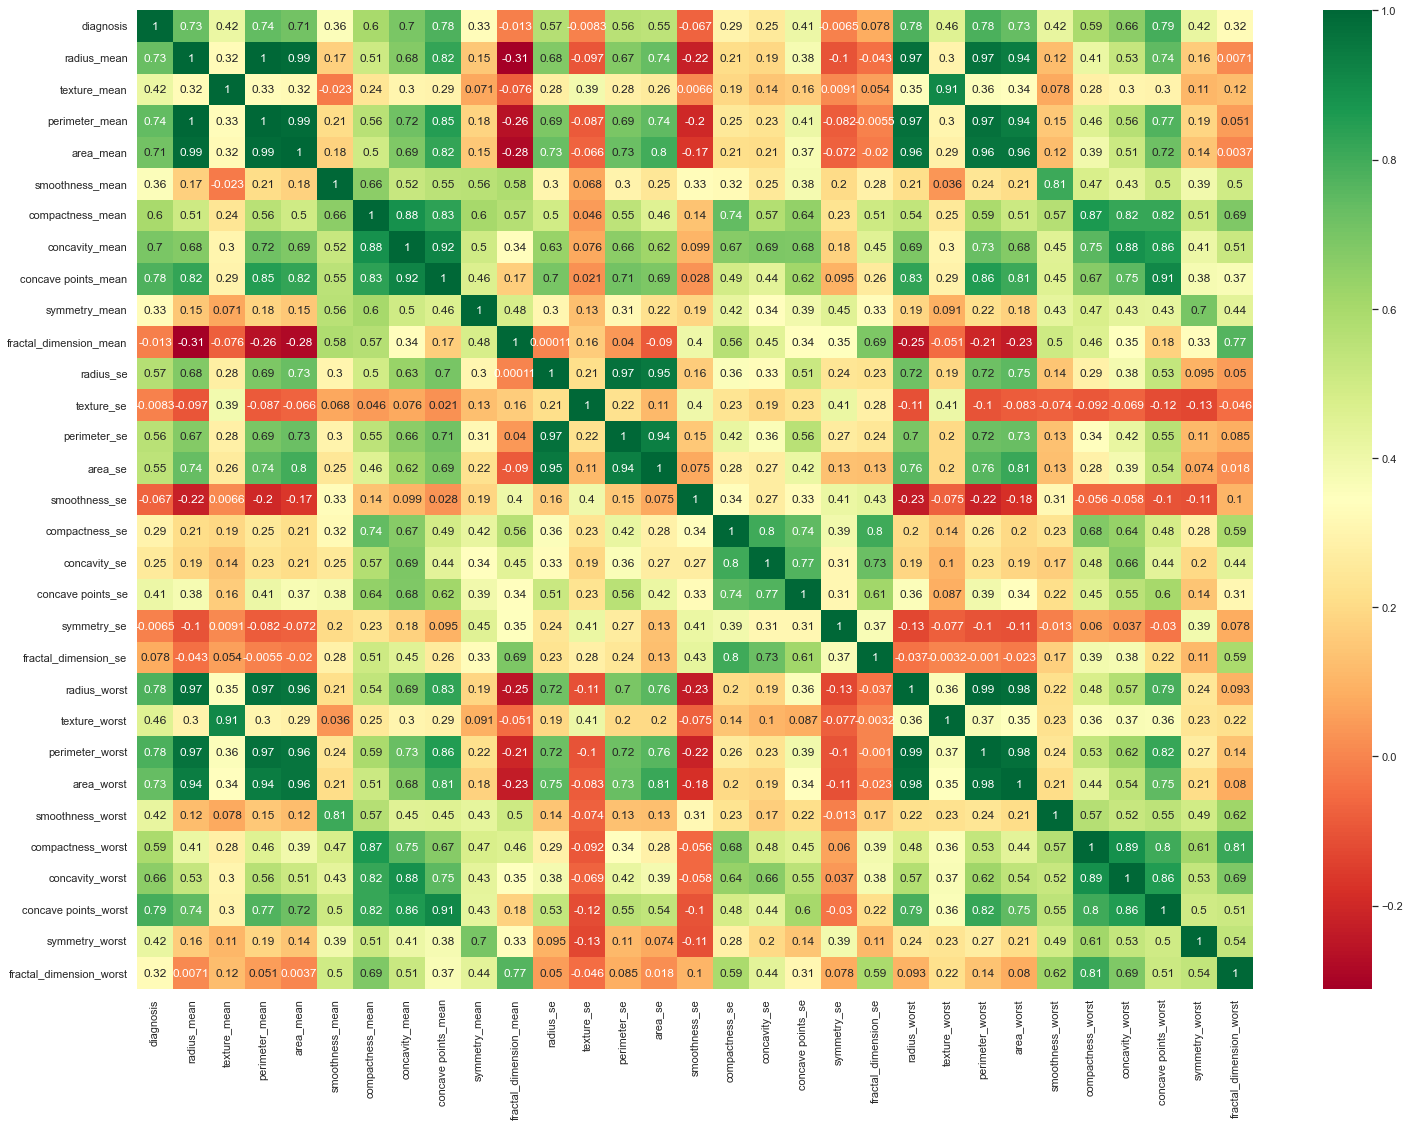

In [17]:
sns.set(rc = {'figure.figsize':(25,18)})
sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlGn')

In [18]:
# sns.pairplot(dataset1)

In [19]:
#MULTI CO LINEARITY DOES NOT AFFECT CLASSIFICATION MODEL.

## TRAIN TEST SPLIT

In [20]:
X=dataset.iloc[:,1:31].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [21]:
Y=dataset.iloc[:,0].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=32)

## LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [24]:
#Train Model

In [25]:
Lr=LogisticRegression()
Lr.fit(X_train,Y_train)

LogisticRegression()

In [26]:
#Training Accuracy 

In [27]:
Y_pred_train1=Lr.predict(X_train)

In [28]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train,Y_pred_train1)
conf_matrix

array([[239,   6],
       [  8, 126]])

In [29]:
print("Accuracy: ", metrics.accuracy_score(Y_train,Y_pred_train1))

Accuracy:  0.9630606860158312


In [30]:
#Test Accuracy 

In [31]:
Y_pred_test1=Lr.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred_test1)
conf_matrix

array([[105,   7],
       [ 10,  68]])

In [33]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred_test1))

Accuracy:  0.9105263157894737


In [34]:
#The model is neither under fit nor overfit.

# DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
#Building Model

In [37]:
dt=DecisionTreeClassifier()

In [38]:
#Training Model

In [39]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
#Training Accuracy 

In [41]:
Y_pred_train2=dt.predict(X_train)

In [42]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train,Y_pred_train2)
conf_matrix

array([[245,   0],
       [  0, 134]])

In [43]:
print("Accuracy: ", metrics.accuracy_score(Y_train,Y_pred_train2))

Accuracy:  1.0


In [44]:
#Test Accuracy 

In [45]:
Y_pred_test2=dt.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred_test2)
conf_matrix

array([[105,   7],
       [ 13,  65]])

In [47]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred_test2))

Accuracy:  0.8947368421052632


## RANDOME FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier 

In [49]:
#BUILDING MODEL

In [50]:
rf=RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=32)

In [51]:
#Training Model

In [52]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=32)

In [53]:
#Training Accuracy 

In [54]:
Y_pred_train3=rf.predict(X_train)

In [55]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train,Y_pred_train3)
conf_matrix

array([[245,   0],
       [  0, 134]])

In [56]:
print("Accuracy: ", metrics.accuracy_score(Y_train,Y_pred_train3))

Accuracy:  1.0


In [57]:
#Test Accuracy 

In [58]:
Y_pred_test3=rf.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred_test3)
conf_matrix

array([[109,   3],
       [  7,  71]])

In [60]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred_test3))

Accuracy:  0.9473684210526315


## KNN

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [63]:
X_train

array([[-0.27188444, -0.24891439, -0.31671283, ..., -0.15388339,
        -1.07704668, -0.81438072],
       [-0.42809225, -0.49791057, -0.46746896, ..., -0.24509071,
         0.59735625, -0.58994666],
       [ 0.1910587 , -0.37923015,  0.1610935 , ..., -0.48003711,
         1.13122385, -0.61488378],
       ...,
       [ 0.55175672,  0.08385621,  0.49967694, ...,  0.56937998,
        -0.40566773, -1.11251782],
       [ 1.31859505,  0.49807416,  1.27405271, ...,  1.37334433,
         1.25902852,  0.8176151 ],
       [-0.11851678, -0.1418693 , -0.13341643, ...,  0.21003229,
        -0.08372939,  0.35267639]])

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , Y_train)

KNeighborsClassifier()

In [69]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    #y_pred_train = knn.predict(x_train)
    error_rate.append(np.mean(Y_pred !=Y_test))    

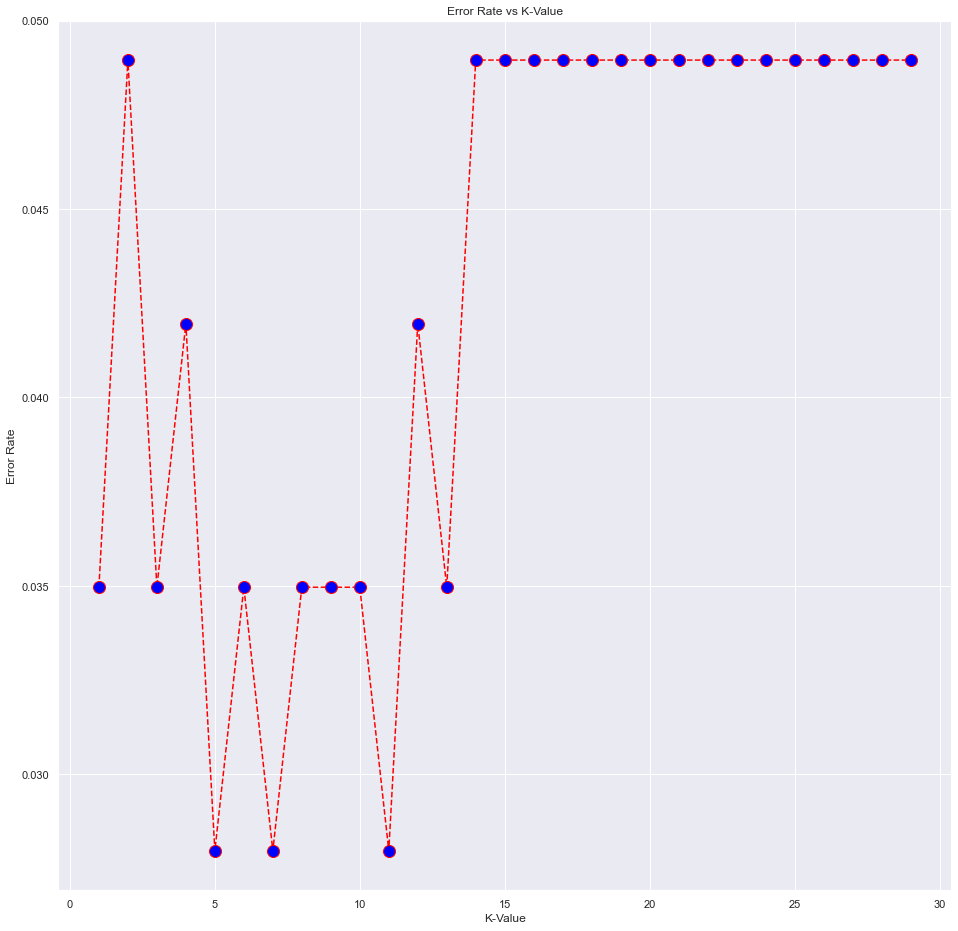

In [70]:
plt.figure(figsize=(16,16))
plt.plot(range(1,30), error_rate, color = 'red', linestyle='dashed',
        marker='o',markersize=12, markerfacecolor= 'blue')
plt.title("Error Rate vs K-Value")
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

In [77]:

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train ,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [78]:
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [80]:
print(classification_report(Y_train, pred_train))
print('/n')
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       269
           1       0.99      0.92      0.96       157

    accuracy                           0.97       426
   macro avg       0.98      0.96      0.97       426
weighted avg       0.97      0.97      0.97       426

/n
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.96      0.96      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [81]:
print(confusion_matrix(Y_train, pred_train))
print('/n')
print(confusion_matrix(Y_test, pred_test))

[[268   1]
 [ 12 145]]
/n
[[86  2]
 [ 2 53]]


In [82]:
print(accuracy_score(Y_train, pred_train))
print('/n')
print(accuracy_score(Y_test, pred_test))

0.9694835680751174
/n
0.972027972027972
